In [12]:
from gnssr import cygnss as cyg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'D:\\data\\20200801\\cyg01.ddmi.s20200801-000000-e20200801-235959.l1.power-brcs.a31.d32.nc'
ds = cyg.read_data(path)

In [3]:
ds

<xarray.Dataset> Size: 3GB
Dimensions:                          (sample: 172420, ddm: 4, delay: 17,
                                      doppler: 11)
Coordinates:
  * sample                           (sample) int32 690kB 0 1 ... 172418 172419
  * ddm                              (ddm) int8 4B 0 1 2 3
    ddm_timestamp_utc                (sample) datetime64[ns] 1MB dask.array<chunksize=(1000,), meta=np.ndarray>
    sp_lat                           (sample, ddm) float32 3MB dask.array<chunksize=(1000, 4), meta=np.ndarray>
    sp_lon                           (sample, ddm) float32 3MB dask.array<chunksize=(1000, 4), meta=np.ndarray>
Dimensions without coordinates: delay, doppler
Data variables: (12/126)
    spacecraft_id                    int16 2B ...
    spacecraft_num                   int8 1B ...
    ddm_source                       int8 1B ...
    ddm_time_type_selector           int8 1B ...
    delay_resolution                 float32 4B ...
    dopp_resolution                  float32 4B ...
    ...                               ...
    quality_flags                    (sample, ddm) float64 6MB dask.array<chunksize=(1000, 4), meta=np.ndarray>
    quality_flags_2                  (sample, ddm) float64 6MB dask.array<chunksize=(1000, 4), meta=np.ndarray>
    raw_counts                       (sample, ddm, delay, doppler) float64 1GB dask.array<chunksize=(1000, 4, 17, 11), meta=np.ndarray>
    power_analog                     (sample, ddm, delay, doppler) float32 516MB dask.array<chunksize=(1000, 4, 17, 11), meta=np.ndarray>
    brcs                             (sample, ddm, delay, doppler) float32 516MB dask.array<chunksize=(1000, 4, 17, 11), meta=np.ndarray>
    eff_scatter                      (sample, ddm, delay, doppler) float32 516MB dask.array<chunksize=(1000, 4, 17, 11), meta=np.ndarray>
Attributes: (12/66)
    Conventions:                          CF-1.6, ACDD-1.3, ISO-8601
    standard_name_vocabulary:             CF Standard Name Table v30
    project:                              CYGNSS
    featureType:                          trajectory
    summary:                              CYGNSS is a NASA Earth Venture miss...
    program:                              CYGNSS
    ...                                   ...
    geospatial_lon_max:                   359.999E
    time_coverage_resolution:             P0DT0H0M1S
    time_coverage_start:                  2020-08-01T00:00:00.499261843Z
    time_coverage_end:                    2020-08-01T23:59:59.999261642Z
    time_coverage_duration:               P1DT0H0M0S
    NCO:                                  4.4.4

In [4]:
df_obs = cyg.extract_obs(ds,['ddm_snr','brcs'])
df_obs

Info: Variable 'brcs' applies a maximum reduction along the 'delay' and 'doppler' dimensions.


,ddm_snr,brcs
0,2.147518,NaN
1,4.753397,1.280344e+10
2,4.705440,6.942846e+09
3,4.301946,1.156356e+10
4,2.237703,NaN
...,...,...
689675,4.736463,5.812624e+09
689676,2.655035,8.787981e+09
689677,3.114665,7.811771e+09
689678,4.691849,1.167083e+10


In [5]:
df_sr = cyg.cal_sr(df_obs,ds,True)
df_sr

The quality control criteria adopted for this function are as follows: 
                    1. quality_flags: s_band_powered_up, large_sc_attitude_err, black_body_ddm, ddm_is_test_pattern,  
                    direct_signal_in_ddm, low_confidence_gps_eirp_estimate, and sp_over_land 
                    2. sp_inc_angle: less than 65 degrees   
                    3. sp_rx_gain: greater than or equal to 0 
                    4. ddm_snr: greater than or equal to 2  
                    5. brcs_ddm_peak_bin_delay_row: between 4 and 15th 


,ddm_snr,brcs,sr,sp_lat,sp_lon
3502,7.160536,3.081757e+10,-22.010879,-28.974260,138.466675
3503,6.241278,1.208066e+10,-23.861675,-32.525711,137.187164
3506,6.985051,2.903808e+10,-22.264199,-28.964478,138.495361
3507,6.205063,1.187128e+10,-23.942982,-32.516518,137.217499
3510,6.153731,2.275243e+10,-23.318681,-28.954685,138.524063
...,...,...,...,...,...
689178,4.175898,1.140187e+10,-27.826606,-20.687754,164.753784
689182,4.759556,1.397315e+10,-26.939693,-20.672642,164.777481
689186,5.343639,1.687945e+10,-26.115311,-20.657532,164.801163
689190,5.433169,1.759244e+10,-25.931919,-20.642426,164.824860


In [6]:
df_region = cyg.filter_data_by_lonlat(df_sr,[50,100,20,30])
df_region


,ddm_snr,brcs,sr,sp_lat,sp_lon
240786,3.216354,4.390080e+10,-25.228950,20.116072,82.341293
240790,2.216323,2.658492e+10,-27.409340,20.132486,82.365028
240794,2.201474,2.634922e+10,-27.449869,20.148863,82.388809
240798,3.279544,3.172984e+10,-26.644877,20.165253,82.412582
240802,3.732677,3.827245e+10,-25.833034,20.181633,82.436356
...,...,...,...,...,...
530307,6.575534,1.212232e+11,-20.087556,20.077833,74.763512
530311,6.164026,1.065880e+11,-20.645321,20.062248,74.787231
530315,6.340940,1.129657e+11,-20.391945,20.046654,74.810951
530319,6.246851,1.096426e+11,-20.520647,20.031073,74.834671


In [9]:
sr_grid = cyg.grid_36km(df_sr,'sr')

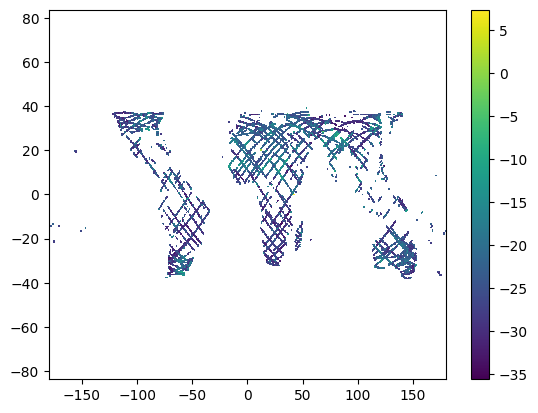

In [15]:
lats_filepath = 'EASE2_M36km.lats.964x406x1.double'  
lons_filepath = 'EASE2_M36km.lons.964x406x1.double'
lats = np.fromfile(lats_filepath, dtype=np.float64).reshape((406, 964))  
lons = np.fromfile(lons_filepath, dtype=np.float64).reshape((406, 964)) 


plt.pcolor(lons,lats,sr_grid)
plt.colorbar()